# Perceptron classifier

- This is called a discrete perceptron, because it returns an answer from a discrete set (the set containing 0 and 1).
- Classification models are similar to regression models, in that their aim is to predict the labels of a dataset based on the features. The difference is that regression models aim to predict a number, whereas classification models aim to predict a state or a category

### Look up that there is a behavior on this data.

if x_crack + x_doing >= 4.0 so he is happy (Positive zone)
else  x_crack + x_doing < 4.0 so he is sad (Negative zone)

x_crack + x_doing - 3.5 = 0

ax1 + bx2 + c = 0

- Positve zone:  ax1 + bx2 + c >= 0
- Negative zone: ax1 + bx2 + c < 0


### Perceptron Algorithm

1. Start with a random perceptron classifier.
1. Slightly improve the classifier. (Repeat many times).
1. Measure the perceptron error to decide when to stop running the loop.


#### Score:

Find the result of apply ax1 + bx2 + c (y_pred).

#### Step function:

Help to predict according to the calculated threadhold 

1 if y_pred >= 0 else 0

#### Perceptron error

Calculate the error that helps to improve the percetron algorithm

0 if y == y_pred else abs(y - y_pred)

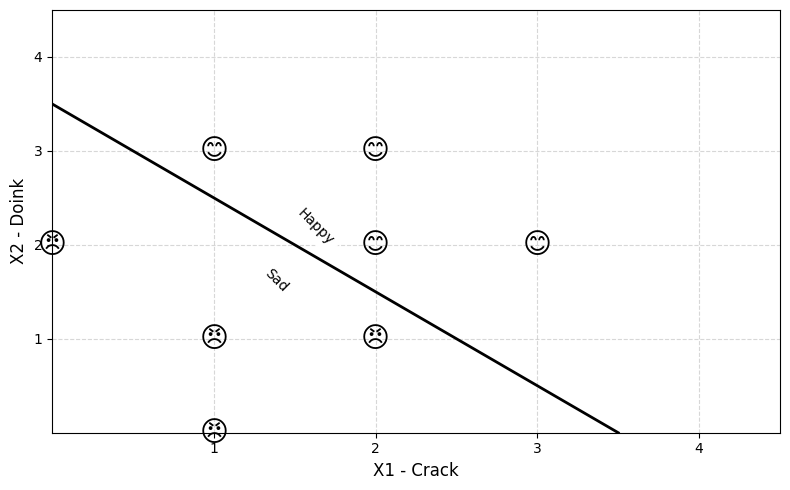

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve


alien_language = pd.DataFrame({
    'Sentence': ['Crack!', 'Doink doink!', 'Crack doink!', 'Crack doink crack!', 'Doink crack doink doink!', 'Crack doink doink crack!', 'Doink doink crack crack crack!', 'Crack doink doink crack doink!'],
    'Crack': [1, 0, 1, 2, 1, 2, 3, 2], 
    'Doink': [0, 2, 1, 1, 3, 2, 2, 3],
})

x1_val, x2_val = symbols('x1 x2')
f = x1_val + x2_val - 3.5


fig, ax = plt.subplots(figsize=(8, 5))
for x, y in alien_language[['Crack', 'Doink']].values:
    if f.subs({x1_val: x, x2_val: y}) >= 0:
        plt.text(x, y, "😊", fontsize=20, ha='center', va='center')
    else:
        plt.text(x, y, "😠", fontsize=20, ha='center', va='center')


# Dibujar línea divisoria
x_vals = [0, 3.5]
y_vals = [3.5, 0]
plt.plot(x_vals, y_vals, 'k-', linewidth=2)  # línea negra

# Texto en la línea
plt.text(1.5, 2.0, 'Happy', rotation=-45, fontsize=10, backgroundcolor='white')
plt.text(1.3, 1.5, 'Sad', rotation=-45, fontsize=10, backgroundcolor='white')

# Configurar ejes
plt.xlim(0, 4.5)
plt.ylim(0, 4.5)

plt.xlabel('X1 - Crack', fontsize=12)
plt.ylabel('X2 - Doink', fontsize=12)


# Remover los ticks de los ejes
ax.set_xticks([1, 2, 3, 4])
ax.set_yticks([1, 2, 3, 4])

# Mostrar cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar gráfico
plt.tight_layout()
plt.show()


In [ ]:
### Inverted


-1 x (ax1 + bx2 + c) = 0

- Positve zone:  ax1 + bx2 + c < 0
- Negative zone: ax1 + bx2 + c >= 0

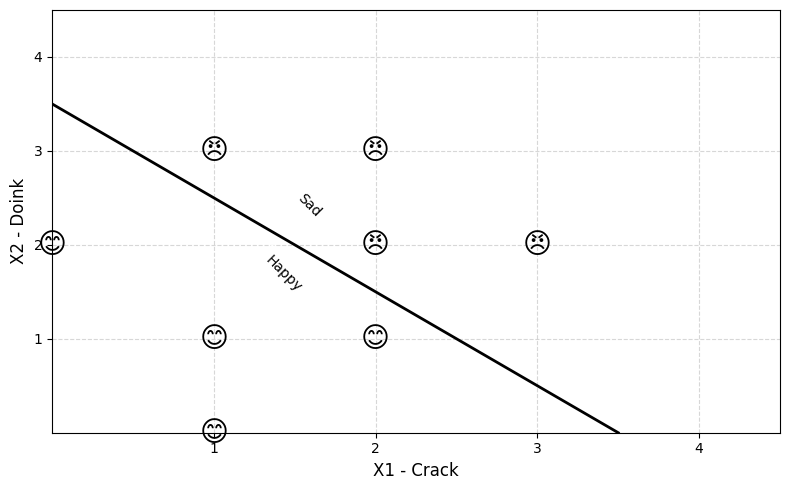

In [2]:
# Inverted 

import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve


alien_language = pd.DataFrame({
    'Sentence': ['Crack!', 'Doink doink!', 'Crack doink!', 'Crack doink crack!', 'Doink crack doink doink!', 'Crack doink doink crack!', 'Doink doink crack crack crack!', 'Crack doink doink crack doink!'],
    'Crack': [1, 0, 1, 2, 1, 2, 3, 2], 
    'Doink': [0, 2, 1, 1, 3, 2, 2, 3],
})

x1_val, x2_val = symbols('x1 x2')
f = - x1_val - x2_val + 3.5


fig, ax = plt.subplots(figsize=(8, 5))
for x, y in alien_language[['Crack', 'Doink']].values:
    if f.subs({x1_val: x, x2_val: y}) >= 0:
        plt.text(x, y, "😊", fontsize=20, ha='center', va='center')
    else:
        plt.text(x, y, "😠", fontsize=20, ha='center', va='center')


# Dibujar línea divisoria
x_vals = [0, 3.5]
y_vals = [3.5, 0]
plt.plot(x_vals, y_vals, 'k-', linewidth=2)  # línea negra

# Texto en la línea
plt.text(1.5, 2.3, 'Sad', rotation=-45, fontsize=10, backgroundcolor='white')
plt.text(1.3, 1.5, 'Happy', rotation=-45, fontsize=10, backgroundcolor='white')

# Configurar ejes
plt.xlim(0, 4.5)
plt.ylim(0, 4.5)

plt.xlabel('X1 - Crack', fontsize=12)
plt.ylabel('X2 - Doink', fontsize=12)


# Remover los ticks de los ejes
ax.set_xticks([1, 2, 3, 4])
ax.set_yticks([1, 2, 3, 4])

# Mostrar cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar gráfico
plt.tight_layout()
plt.show()

## Step function

The function that returns a 1 if the output is nonnegative and a 0 if the output is negative. In other words, if the input is x, then

step(x) = 1 if x >= 0

step(x) = 1 if x < 0

y_pred = step(ax1 + bx2 + c)

The step function is a specific case of an activation function

## Mean Perceptron Error



In [3]:
import pandas as pd
from sympy import symbols


alien_language = pd.DataFrame({
    'Crack': [1, 0, 1, 3],  
    'Doink': [0, 1, 3, 2],
    'Target': [0, 1, 1, 0]
})

x1, x2 = symbols('x1 x2')

score_func1 = x1 + (2 * x2) - 4
score_func2 = -x1 + x2

def step_func(y_pred):
    return 1 if y_pred >= 0 else 0

def error_func(y, y_pred, score):
    return 0 if y_pred == y else abs(score)

data = []

for x1_val, x2_val, y in alien_language[['Crack', 'Doink', 'Target']].values:
    score1 = score_func1.subs({x1: x1_val, x2: x2_val})
    score2 = score_func2.subs({x1: x1_val, x2: x2_val})
    pred1 = step_func(score1)
    pred2 = step_func(score2)
    error1 = error_func(y, pred1, score1)
    error2 = error_func(y, pred2, score2)
    data.append({
        'X1': x1_val,
        'X2': x2_val,
        'Target': y,
        'Predict1': pred1,
        'Predict2': pred2,
        'Score1': score1,
        'Score2': score2,
        'Error1': error1,
        'Error2': error2
    })

results_df = pd.DataFrame(data)
print(f"Mean Perceptron Error for Score1: {results_df['Error1'].mean()}")
print(f"Mean Perceptron Error for Score2: {results_df['Error2'].mean()}")
results_df

Mean Perceptron Error for Score1: 1.25
Mean Perceptron Error for Score2: 0.0


,X1,X2,Target,Predict1,Predict2,Score1,Score2,Error1,Error2
0,1,0,0,0,0,-3,-1,0,0
1,0,1,1,0,1,-2,1,2,0
2,1,3,1,1,1,3,2,0,0
3,3,2,0,1,0,3,-1,3,0


## Perceptron algorithm

The process is called the perceptron algorithm, and it consists of starting with a random perceptron classifier and slowly improving it until we have a good one. The main steps of the perceptron algorithm follow:

Start with a random perceptron classifier.
Slightly improve the classifier. (Repeat many times).
Measure the perceptron error to decide when to stop running the loop.

We start by developing the step inside the loop, a technique used to slightly improve a perceptron classifier called the perceptron trick. It is similar to the square and absolute tricks we learned in the sections “The square trick” and “The absolute trick”.

Instead of subtracting the learning rate from each weight, we subtracted the learning rate times the number of appearances of the word in the sentence. The true reason for this is calculus. In other words, when we develop the gradient descent method, the derivative of the error function forces us to do this. This process is detailed in appendix B, section “Using gradient descent to train classification models.”

Pseudocode for the perceptron trick

Inputs:

A perceptron with weights a, b, and bias c
A point with coordinates (x1, x2) and label y
A small positive value η (the learning rate)
Output:

A perceptron with new weights a', b', and bias c'
Procedure:

The prediction the perceptron makes at the point is ŷ = step(ax1 + bx2 + c).

Case 1: If ŷ = y:

Return the original perceptron with weights a', b', and bias c'.

Case 2: If ŷ = 1 and y = 0:

Return the perceptron with the following weights and bias:

a' = a – ηx1

b' = b – ηx2

c' = c – ηx1

Case 3: If ŷ = 0 and y = 1:

Return the perceptron with the following weights and bias:

a' = a + ηx1

b' = b – ηx2

c' = c + ηx1

Final weights: a=0.09442185152504763, b=0.067954402940302, c=-0.27942841916915534
Minimum error at epoch 234 with error value: 0.0, weights: a=0.11442185152504764, b=0.077954402940302, c=-0.26942841916915533


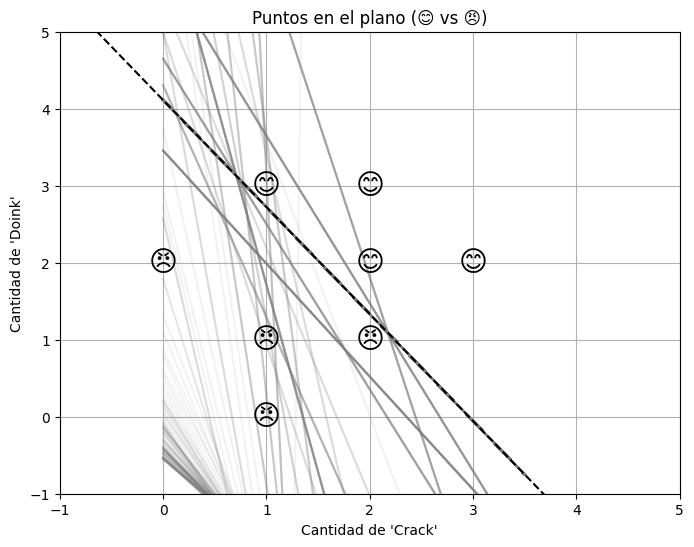

La frase 'Crack doink doink crack doink!' es triste 😠


In [5]:
import random
import re
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

random.seed(0)

def perceptron_trick(a, b, c, x1, x2, y, learning_rate=0.01):
    # predicción
    y_pred = a * x1 + b * x2 + c
    #  1 * 0 <= 0 => true
    #  0 * 1 <= 0 => true
    #  1 * 1 <=0  => false
    #  0 * 0 <=0  => false
    if y * y_pred <= 0:  # si se clasifica mal
        a += learning_rate * y * x1
        b += learning_rate * y * x2
        c += learning_rate * y
    return a, b, c


def score(weights, bias, features):
    return features.dot(weights) + bias

def step(x):
    if x >= 0:
        return 1
    else:
        return 0

def prediction(weights, bias, features):
    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    pred = prediction(weights, bias, features)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, features))

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

def perceptron(features, labels, learning_rate=0.01, epochs = 1000):
    a = random.random()
    b = random.random()
    c = random.random()
    history = [(a, b, c)]
    errors = []

    for epoch in range(epochs):
        i = random.randint(0, len(features)-1)
        x1 = features[i][0]
        x2 = features[i][1]
        y = 1 if labels[i] == 1 else -1  # convertir 0 a -1 para el perceptrón clásico

        a, b, c = perceptron_trick(a, b, c, x1, x2, y, learning_rate=learning_rate)
        error = mean_perceptron_error([a, b], c, features, labels)
        errors.append(error)
        history.append((a, b, c)) 

    return a, b, c, errors, history

# Datos
alien_language = pd.DataFrame({
    'Sentence': ['Crack!', 'Doink doink!', 'Crack doink!', 'Crack doink crack!', 'Doink crack doink doink!', 'Crack doink doink crack!', 'Doink doink crack crack crack!', 'Crack doink doink crack doink!'],
    'Crack': [1, 0, 1, 2, 1, 2, 3, 2], 
    'Doink': [0, 2, 1, 1, 3, 2, 2, 3],
})

def count_word(sentence, word):
    return len(re.findall(rf'\b{word}\b', sentence.lower()))

data = pd.DataFrame({
    'x1': alien_language['Sentence'].apply(lambda s: count_word(s, 'crack')),
    'x2': alien_language['Sentence'].apply(lambda s: count_word(s, 'doink')),
    'y': [0, 0, 0, 0, 1, 1, 1, 1]
})

# Graficar los puntos
plt.figure(figsize=(8, 6))
for x1, x2, y in zip(data['x1'], data['x2'], data['y']):
    if y == 1:
        plt.text(x1, x2, "😊", fontsize=20, ha='center', va='center')
    else:
        plt.text(x1, x2, "😠", fontsize=20, ha='center', va='center')

# Entrenar perceptrón
features = data[['x1', 'x2']].values
labels = data['y'].values
a, b, c, errors, history = perceptron(features, labels, learning_rate=0.01, epochs=1000)
print(f"Final weights: a={a}, b={b}, c={c}")

min_error_index = errors.index(min(errors))
print(f"Minimum error at epoch {min_error_index} with error value: {errors[min_error_index]}, weights: a={history[min_error_index][0]}, b={history[min_error_index][1]}, c={history[min_error_index][2]}")


for a_i, b_i, c_i in history[:-1]:  # Excluye la final
    if abs(b_i) > 1e-6:
        y_vals = [-(a_i * x + c_i) / b_i for x in x_vals]
        plt.plot(x_vals, y_vals, color='gray', alpha=0.1)

x_vals = [min(data['x1']) - 1, max(data['x1']) + 1]
y_vals = [-(a * x + c) / b for x in x_vals]
plt.plot(x_vals, y_vals, 'k--', label="Línea de decisión")


plt.xlim(-1, max(data['x1']) + 2)
plt.ylim(-1, max(data['x2']) + 2)
plt.xlabel("Cantidad de 'Crack'")
plt.ylabel("Cantidad de 'Doink'")
plt.grid(True)
plt.title("Puntos en el plano (😊 vs 😠)")
plt.show()


y = a * 0 + b * 0 + c
if y >= 0:
    print("La frase 'Crack doink doink crack doink!' es feliz 😊")
else:
    print("La frase 'Crack doink doink crack doink!' es triste 😠")




The number of times we run the algorithm is the number of epochs. Therefore, this algorithm has two hyperparameters: the number of epochs, and the learning rate. The pseudocode of the perceptron algorithm follows:

Ecuación de la recta en el perceptrón

La ecuación que representa la línea de decisión del perceptrón es:

a * x + b * y + c = 0

Donde:
- x y y son las coordenadas (en tu caso, cantidad de 'crack' y 'doink')
- a, b y c son los parámetros aprendidos por el perceptrón.

Esta ecuación representa la frontera que separa las dos clases. Todos los puntos que caen sobre la línea satisfacen esta igualdad.

- Si un punto da como resultado > 0, se considera de una clase (por ejemplo 😊).
- Si da < 0, se considera de la otra clase (por ejemplo 😠).

Para graficarla, se despeja y:

Partimos de:
a * x + b * y + c = 0

Despejando y:
b * y = -a * x - c
y = -(a/b) * x - (c/b)

En esta forma:
- -(a/b) es la pendiente
- -(c/b) es el intercepto en el eje Y